In [40]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [41]:
# Load the dataset
# Assuming you have a CSV file named 'company_strategies.csv' with historical data
data = pd.read_csv('Travel_Pin_Dataset.csv')
print(data)

       Ticket_ID Travel_Type  Ticket_Price  Time  Distance       Agency  \
0              1  firstClass       1434.38  1.76    676.53  FlyingDrops   
1              2  firstClass       1292.29  1.76    676.53  FlyingDrops   
2              3  firstClass       1487.52  1.66    637.56      CloudFy   
3              4  firstClass       1127.36  1.66    637.56      CloudFy   
4              5  firstClass       1684.05  2.16    830.86      CloudFy   
...          ...         ...           ...   ...       ...          ...   
52249      52252     premium        875.41  1.44    555.74      Rainbow   
52250      52253    economic        889.07  1.66    637.56      Rainbow   
52251      52254    economic        555.01  1.66    637.56      Rainbow   
52252      52255    economic        583.60  0.72    277.70      CloudFy   
52253      52256    economic        506.56  0.72    277.70      CloudFy   

      Flight_Type Ch_code  Travel_Ticket_Pin_ID  Travel_ModePrice  ...    PCS  \
0           Spice 

<ipython-input-41-044eb38fa989>:3: DtypeWarning: Columns (16,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Travel_Pin_Dataset.csv')


In [42]:
print(data.head)
print(data.tail)
print(data.describe)

<bound method NDFrame.head of        Ticket_ID Travel_Type  Ticket_Price  Time  Distance       Agency  \
0              1  firstClass       1434.38  1.76    676.53  FlyingDrops   
1              2  firstClass       1292.29  1.76    676.53  FlyingDrops   
2              3  firstClass       1487.52  1.66    637.56      CloudFy   
3              4  firstClass       1127.36  1.66    637.56      CloudFy   
4              5  firstClass       1684.05  2.16    830.86      CloudFy   
...          ...         ...           ...   ...       ...          ...   
52249      52252     premium        875.41  1.44    555.74      Rainbow   
52250      52253    economic        889.07  1.66    637.56      Rainbow   
52251      52254    economic        555.01  1.66    637.56      Rainbow   
52252      52255    economic        583.60  0.72    277.70      CloudFy   
52253      52256    economic        506.56  0.72    277.70      CloudFy   

      Flight_Type Ch_code  Travel_Ticket_Pin_ID  Travel_ModePrice  ..

In [43]:
# Create target variable for classification (1 if next day's closing price is higher, 0 otherwise)
data['Target'] = (data['Travel_Ticket_Pin_ID'].shift(-1) > data['Travel_Ticket_Pin_ID']).astype(int)

In [44]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [47]:
# Gathering the Companies Strategies Information
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Travel_Ticket_Pin_ID', 'Travel_Administration', 'Travel_Location_Spend', 'Postel_Code']])
print(scaled_data)

[[-3.31230284 -6.04527784  7.43509899 -0.33267423]
 [-3.31278324 -5.62053337  6.18626171  0.49125446]
 [-3.31454473 -7.09399773  4.57560422 -0.2805157 ]
 ...
 [ 1.47174279  0.87752893  1.21711197 -1.75172204]
 [ 1.47179617  0.87755827  1.21715676  0.5531351 ]
 [ 1.47184955  0.8775876   1.21720154  1.4899701 ]]


In [48]:
# Create features and target variable
X = scaled_data[:, :-1]
y = data['Target'].values

In [49]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=25)

In [51]:
print(X_train)

[[ 0.06842274  0.1063596   0.0397072 ]
 [ 0.05918826  0.10128496  0.03195935]
 [-0.86196404 -0.40491775 -0.74090007]
 ...
 [-0.96402368 -0.46100279 -0.82652951]
 [ 0.01152129  0.07509043 -0.0080339 ]
 [ 0.27489067  0.21982034  0.21293663]]


In [52]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy}')

Decision Tree Accuracy: 0.9752746201247752


In [53]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.9750066980518238


In [54]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy}')

Logistic Regression Accuracy: 0.9740115589237187


In [55]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 0.9751980709610748


In [56]:
# Generate data
tickets = np.random.randint(0, 100, (1000, 10))
pins = np.random.randint(0, 10, (1000, 4))

# Normalize data
tickets = tickets / 100
pins = pins / 10

# Split data into train and test sets
split = int(0.8 * len(tickets))
train_tickets, test_tickets = tickets[:split], tickets[split:]
train_pins, test_pins = pins[:split], pins[split:]

# Define RNN model
model = Sequential([
    LSTM(32, input_shape=(train_tickets.shape[1], 1)),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data for RNN input
train_tickets = train_tickets.reshape((train_tickets.shape[0], train_tickets.shape[1], 1))
test_tickets = test_tickets.reshape((test_tickets.shape[0], test_tickets.shape[1], 1))

# Train model
model.fit(train_tickets, train_pins, epochs=10, batch_size=32, validation_data=(test_tickets, test_pins))

# Evaluate model
loss, accuracy = model.evaluate(test_tickets, test_pins)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
25/25 [==============================] - 3s 29ms/step - loss: 2.5199 - accuracy: 0.2862 - val_loss: 2.5791 - val_accuracy: 0.3200
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 2.5617 - accuracy: 0.2875 - val_loss: 2.6940 - val_accuracy: 0.3200
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 2.7184 - accuracy: 0.2875 - val_loss: 2.8760 - val_accuracy: 0.3200
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 2.8650 - accuracy: 0.2875 - val_loss: 3.0132 - val_accuracy: 0.3200
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 2.9915 - accuracy: 0.2875 - val_loss: 3.1240 - val_accuracy: 0.3200
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 3.0440 - accuracy: 0.2875 - val_loss: 3.2129 - val_accuracy: 0.3200
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 3.1502 - accuracy: 0.2875 - val_loss: 3.3047 - val_accuracy: 0.3200
Epoch 8/10
25/25 [=

In [57]:
# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(knn_predictions)

[1 1 1 ... 1 1 1]


In [58]:
# Neural Network using TensorFlow
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
nn_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f'Neural Network Accuracy: {nn_accuracy}')

Epoch 1/20
817/817 [==============================] - 4s 4ms/step - loss: 0.1491 - accuracy: 0.9627 - val_loss: 0.0555 - val_accuracy: 0.9754
Epoch 2/20
817/817 [==============================] - 2s 3ms/step - loss: 0.0524 - accuracy: 0.9752 - val_loss: 0.0507 - val_accuracy: 0.9753
Epoch 3/20
817/817 [==============================] - 2s 3ms/step - loss: 0.0505 - accuracy: 0.9745 - val_loss: 0.0500 - val_accuracy: 0.9740
Epoch 4/20
817/817 [==============================] - 3s 3ms/step - loss: 0.0494 - accuracy: 0.9747 - val_loss: 0.0484 - val_accuracy: 0.9760
Epoch 5/20
817/817 [==============================] - 3s 3ms/step - loss: 0.0482 - accuracy: 0.9742 - val_loss: 0.0497 - val_accuracy: 0.9728
Epoch 6/20
817/817 [==============================] - 3s 4ms/step - loss: 0.0473 - accuracy: 0.9749 - val_loss: 0.0463 - val_accuracy: 0.9731
Epoch 7/20
817/817 [==============================] - 3s 3ms/step - loss: 0.0463 - accuracy: 0.9739 - val_loss: 0.0453 - val_accuracy: 0.9754
Epoch 

In [59]:
# Deep Learning with Keras
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
dl_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
dl_accuracy = accuracy_score(y_test, dl_predictions)
print(f'DL Accuracy: {dl_accuracy}')

Epoch 1/10
817/817 [==============================] - 3s 2ms/step - loss: 0.0989 - accuracy: 0.9737
Epoch 2/10
817/817 [==============================] - 1s 2ms/step - loss: 0.0497 - accuracy: 0.9736
Epoch 3/10
817/817 [==============================] - 2s 3ms/step - loss: 0.0463 - accuracy: 0.9735
Epoch 4/10
817/817 [==============================] - 2s 2ms/step - loss: 0.0437 - accuracy: 0.9747
Epoch 5/10
817/817 [==============================] - 1s 2ms/step - loss: 0.0424 - accuracy: 0.9742
Epoch 6/10
817/817 [==============================] - 1s 2ms/step - loss: 0.0411 - accuracy: 0.9742
Epoch 7/10
817/817 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.9737
Epoch 8/10
817/817 [==============================] - 1s 2ms/step - loss: 0.0397 - accuracy: 0.9749
Epoch 9/10
817/817 [==============================] - 1s 2ms/step - loss: 0.0397 - accuracy: 0.9734
Epoch 10/10
817/817 [==============================] - 1s 1ms/step
DL Accuracy: 0.973858460596318


In [60]:
# Evaluation
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("Deep Learning Accuracy:", accuracy_score(y_test, dl_predictions))
print(f'Decision Tree Accuracy: {dt_accuracy}')
print("DL Accuracy:", accuracy_score(y_test, dl_predictions))

Random Forest Classifier Accuracy: 0.9750066980518238
Logistic Regression Accuracy: 0.9740115589237187
SVM Accuracy: 0.9751980709610748
KNN Accuracy: 0.9741646572511196
Deep Learning Accuracy: 0.973858460596318
Decision Tree Accuracy: 0.9752746201247752
DL Accuracy: 0.973858460596318


In [61]:
# Confusion Matrix :
print("\nConfusion Matrix for #RandomForestClassifier:")
print(confusion_matrix(y_test, rf_predictions))


Confusion Matrix for #RandomForestClassifier:
[[  305   326]
 [  327 25169]]


In [62]:
# Confusion Matrix :
print("\nConfusion Matrix for #Logistic Regression :")
print(confusion_matrix(y_test, lr_predictions))


Confusion Matrix for #Logistic Regression :
[[  210   421]
 [  258 25238]]


In [63]:
# Confusion Matrix :
print("\nConfusion Matrix for #Support Vector Machine:")
print(confusion_matrix(y_test, svm_predictions))


Confusion Matrix for #Support Vector Machine:
[[   51   580]
 [   68 25428]]


In [64]:
# Confusion Matrix :
print("\nConfusion Matrix for #KNeighborsClassifier:")
print(confusion_matrix(y_test, knn_predictions))


Confusion Matrix for #KNeighborsClassifier:
[[  298   333]
 [  342 25154]]


In [65]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=54)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test)

[[-0.76206989 -0.35685523 -0.67181005]
 [-3.02183875 -0.63012379 -1.09144349]
 [-0.62041866 -0.27813553 -0.55092742]
 ...
 [-1.17597467 -0.58687415 -1.02502899]
 [-0.65957254 -0.29989447 -0.58434064]
 [-0.33266446 -0.11822215 -0.30536313]]


In [66]:
'''Implement and train SVM model'''
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9750263132714573


In [67]:
'''Implement and train CNN model'''

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train_cnn)
print(X_test_cnn)

[[[-0.41531669]
  [-0.1641544 ]
  [-0.37589707]]

 [[-0.59236732]
  [-0.26254658]
  [-0.52698891]]

 [[ 0.66769036]
  [ 0.43770411]
  [ 0.54832179]]

 ...

 [[-0.40491141]
  [-0.15837188]
  [-0.36701739]]

 [[ 0.82757764]
  [ 0.52655812]
  [ 0.68476674]]

 [[-0.94142684]
  [-0.4565291 ]
  [-0.82487006]]]
[[[-0.76206989]
  [-0.35685523]
  [-0.67181005]]

 [[-3.02183875]
  [-0.63012379]
  [-1.09144349]]

 [[-0.62041866]
  [-0.27813553]
  [-0.55092742]]

 ...

 [[-1.17597467]
  [-0.58687415]
  [-1.02502899]]

 [[-0.65957254]
  [-0.29989447]
  [-0.58434064]]

 [[-0.33266446]
  [-0.11822215]
  [-0.30536313]]]


In [68]:
# Step 6: Visualize the results
# Assuming you have predictions from both models
svm_predictions = svm_model.predict(X_test)
print(svm_predictions)

[1 1 1 ... 1 1 1]


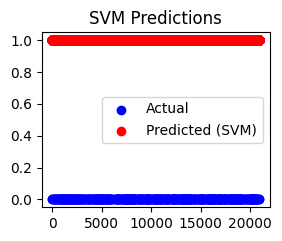

In [82]:
# Plotting SVM predictions
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(svm_predictions)), svm_predictions, label='Predicted (SVM)', color='red')
plt.title('SVM Predictions')
plt.legend()

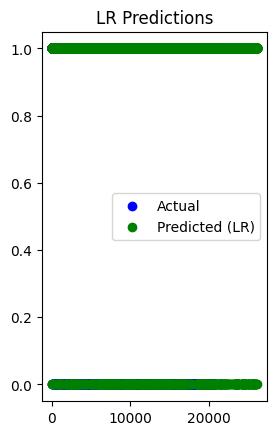

In [70]:
# Plotting LR predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(lr_predictions)), lr_predictions, label='Predicted (LR)', color='green')
plt.title('LR Predictions')
plt.legend()
plt.show()

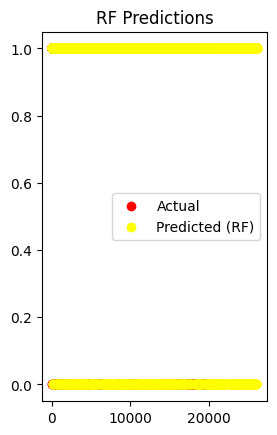

In [71]:
# Plotting RF predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='red')
plt.scatter(range(len(rf_predictions)), rf_predictions, label='Predicted (RF)', color='yellow')
plt.title('RF Predictions')
plt.legend()
plt.show()

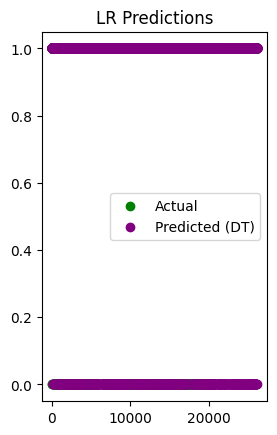

In [72]:
# Plotting DT predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green')
plt.scatter(range(len(dt_predictions)), dt_predictions, label='Predicted (DT)', color='purple')
plt.title('LR Predictions')
plt.legend()
plt.show()

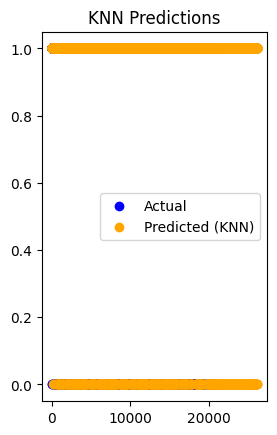

In [74]:
# Plotting KNN predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(knn_predictions)), knn_predictions, label='Predicted (KNN)', color='orange')
plt.title('KNN Predictions')
plt.legend()
plt.show()

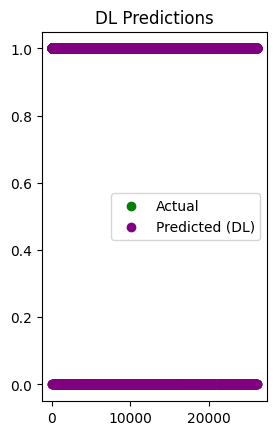

In [75]:
# Plotting DL predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green')
plt.scatter(range(len(dl_predictions)), dl_predictions, label='Predicted (DL)', color='purple')
plt.title('DL Predictions')
plt.legend()
plt.show()